In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import scanpy.api as sc
import scvelo as scv
import seaborn as sns

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, dpi_save=300)

results_file = '../data/write/fig5d.h5ad'
data_path_base = '../data/loom/'


In [2]:
E11F_badata_path = data_path_base + 'E11Y_all.loom'
E11A_badata_path = data_path_base + 'E11A_all.loom'
E12F_badata_path = data_path_base + 'E12F_all.loom'
E14F_badata_path = data_path_base + 'E14F_all.loom'

In [3]:
E11F_badata= scv.read(E11F_badata_path, cache=True)
E11A_badata= scv.read(E11A_badata_path, cache=True)
E12F_badata= scv.read(E12F_badata_path, cache=True)
E14F_badata= scv.read(E14F_badata_path, cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/..-data-loom-E11Y_all.h5ad
... reading from cache file cache/..-data-loom-E11A_all.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache/..-data-loom-E12F_all.h5ad
... reading from cache file cache/..-data-loom-E14F_all.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
E11F_badata.var_names_make_unique
E11A_badata.var_names_make_unique
E12F_badata.var_names_make_unique
E14F_badata.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 16 × 31053 
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'>

In [5]:
E11A_badata

AnnData object with n_obs × n_vars = 48 × 31053 
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [6]:
E11F_badata

AnnData object with n_obs × n_vars = 16 × 31053 
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [7]:
E12F_badata

AnnData object with n_obs × n_vars = 16 × 31053 
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [8]:
E14F_badata

AnnData object with n_obs × n_vars = 16 × 31053 
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [9]:
E11_add_bdata = E11A_badata.concatenate(E11F_badata)
E12_add_bdata = E11_add_bdata.concatenate(E12F_badata)
adata = E12_add_bdata.concatenate(E14F_badata)

Making variable names unique for controlled concatenation.
Making variable names unique for controlled concatenation.
Making variable names unique for controlled concatenation.


In [10]:
adata

AnnData object with n_obs × n_vars = 96 × 31053 
    obs: 'batch'
    var: 'Accession-0-0-0', 'Chromosome-0-0-0', 'End-0-0-0', 'Start-0-0-0', 'Strand-0-0-0', 'Accession-1-0-0', 'Chromosome-1-0-0', 'End-1-0-0', 'Start-1-0-0', 'Strand-1-0-0', 'Accession-1-0', 'Chromosome-1-0', 'End-1-0', 'Start-1-0', 'Strand-1-0', 'Accession-1', 'Chromosome-1', 'End-1', 'Start-1', 'Strand-1'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [11]:
adata[:, 'Chrnb1'].X

array([ 68.,   0.,   0.,   0.,   0., 130., 183.,  94.,   0.,   0.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  10.,   0.,   0., 538.,   0., 418.,   0.,  12.,
         0.,   0.,   0.,   0.,  34.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 106.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 880.,   0.,   0.], dtype=float32)

In [12]:
adata[:, 'Gm15555'].X

array([  0.,   0.,   0.,   0.,  10.,   0.,  20.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,  12.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  86.,   0.,  92.,   0.,   0.,   0.,   0.,
         0.,   0.,  68.,   0.,   0., 128.,  66.,   0.], dtype=float32)

In [13]:
adata.obs['number']  = ['S{}'.format(str(i)) for i in range(139, 235)]
adata.obs['subgroup'] = ['E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A',
                         'E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y',
                         'E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F',
                         'E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F']
adata

AnnData object with n_obs × n_vars = 96 × 31053 
    obs: 'batch', 'number', 'subgroup'
    var: 'Accession-0-0-0', 'Chromosome-0-0-0', 'End-0-0-0', 'Start-0-0-0', 'Strand-0-0-0', 'Accession-1-0-0', 'Chromosome-1-0-0', 'End-1-0-0', 'Start-1-0-0', 'Strand-1-0-0', 'Accession-1-0', 'Chromosome-1-0', 'End-1-0', 'Start-1-0', 'Strand-1-0', 'Accession-1', 'Chromosome-1', 'End-1', 'Start-1', 'Strand-1'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [14]:
adata = adata[adata.obs['subgroup'] != 'E11Y'] # DEl 'E11Y'

In [15]:
num_first =  ['{}'.format(str(i)) for i in range(823, 871)]
num_first.extend( ['{}'.format(str(i)) for i in range(887, 919)])
adata.obs_names = num_first
adata.obs_names

Index(['823', '824', '825', '826', '827', '828', '829', '830', '831', '832',
       '833', '834', '835', '836', '837', '838', '839', '840', '841', '842',
       '843', '844', '845', '846', '847', '848', '849', '850', '851', '852',
       '853', '854', '855', '856', '857', '858', '859', '860', '861', '862',
       '863', '864', '865', '866', '867', '868', '869', '870', '887', '888',
       '889', '890', '891', '892', '893', '894', '895', '896', '897', '898',
       '899', '900', '901', '902', '903', '904', '905', '906', '907', '908',
       '909', '910', '911', '912', '913', '914', '915', '916', '917', '918'],
      dtype='object')

In [16]:
sc.tl.pca(adata,  n_comps = 20)
sc.pp.neighbors(adata, n_neighbors=20)
sc.tl.draw_graph(adata)

Trying to set attribute `.obsm` of view, making a copy.


Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 20


/home/yama/singlecell/project_uth_yoshimoto_Fig5A/.venv/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../project_uth_yoshimoto_Fig5A/.venv/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()


    finished (0:00:00.27)
computing neighbors
    using 'X_pca' with n_pcs = 20


/home/yama/singlecell/project_uth_yoshimoto_Fig5A/.venv/lib/python3.7/site-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../project_uth_yoshimoto_Fig5A/.venv/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  state.func_ir.loc))
/home/yama/singlecell/project_uth_yoshimoto_Fig5A/.venv/lib/python3.7/site-packages/numba/core/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "../../project_uth_yoshimoto_Fig5A/.venv/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  state.func_ir.loc))


    finished (0:00:02.56) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
drawing single-cell graph using layout "fa"
    finished (0:00:00.05) --> added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm)


... storing 'subgroup' as categorical
... storing 'Chromosome-0-0-0' as categorical
... storing 'Strand-0-0-0' as categorical
... storing 'Chromosome-1-0-0' as categorical
... storing 'Strand-1-0-0' as categorical
... storing 'Chromosome-1-0' as categorical
... storing 'Strand-1-0' as categorical
... storing 'Chromosome-1' as categorical
... storing 'Strand-1' as categorical


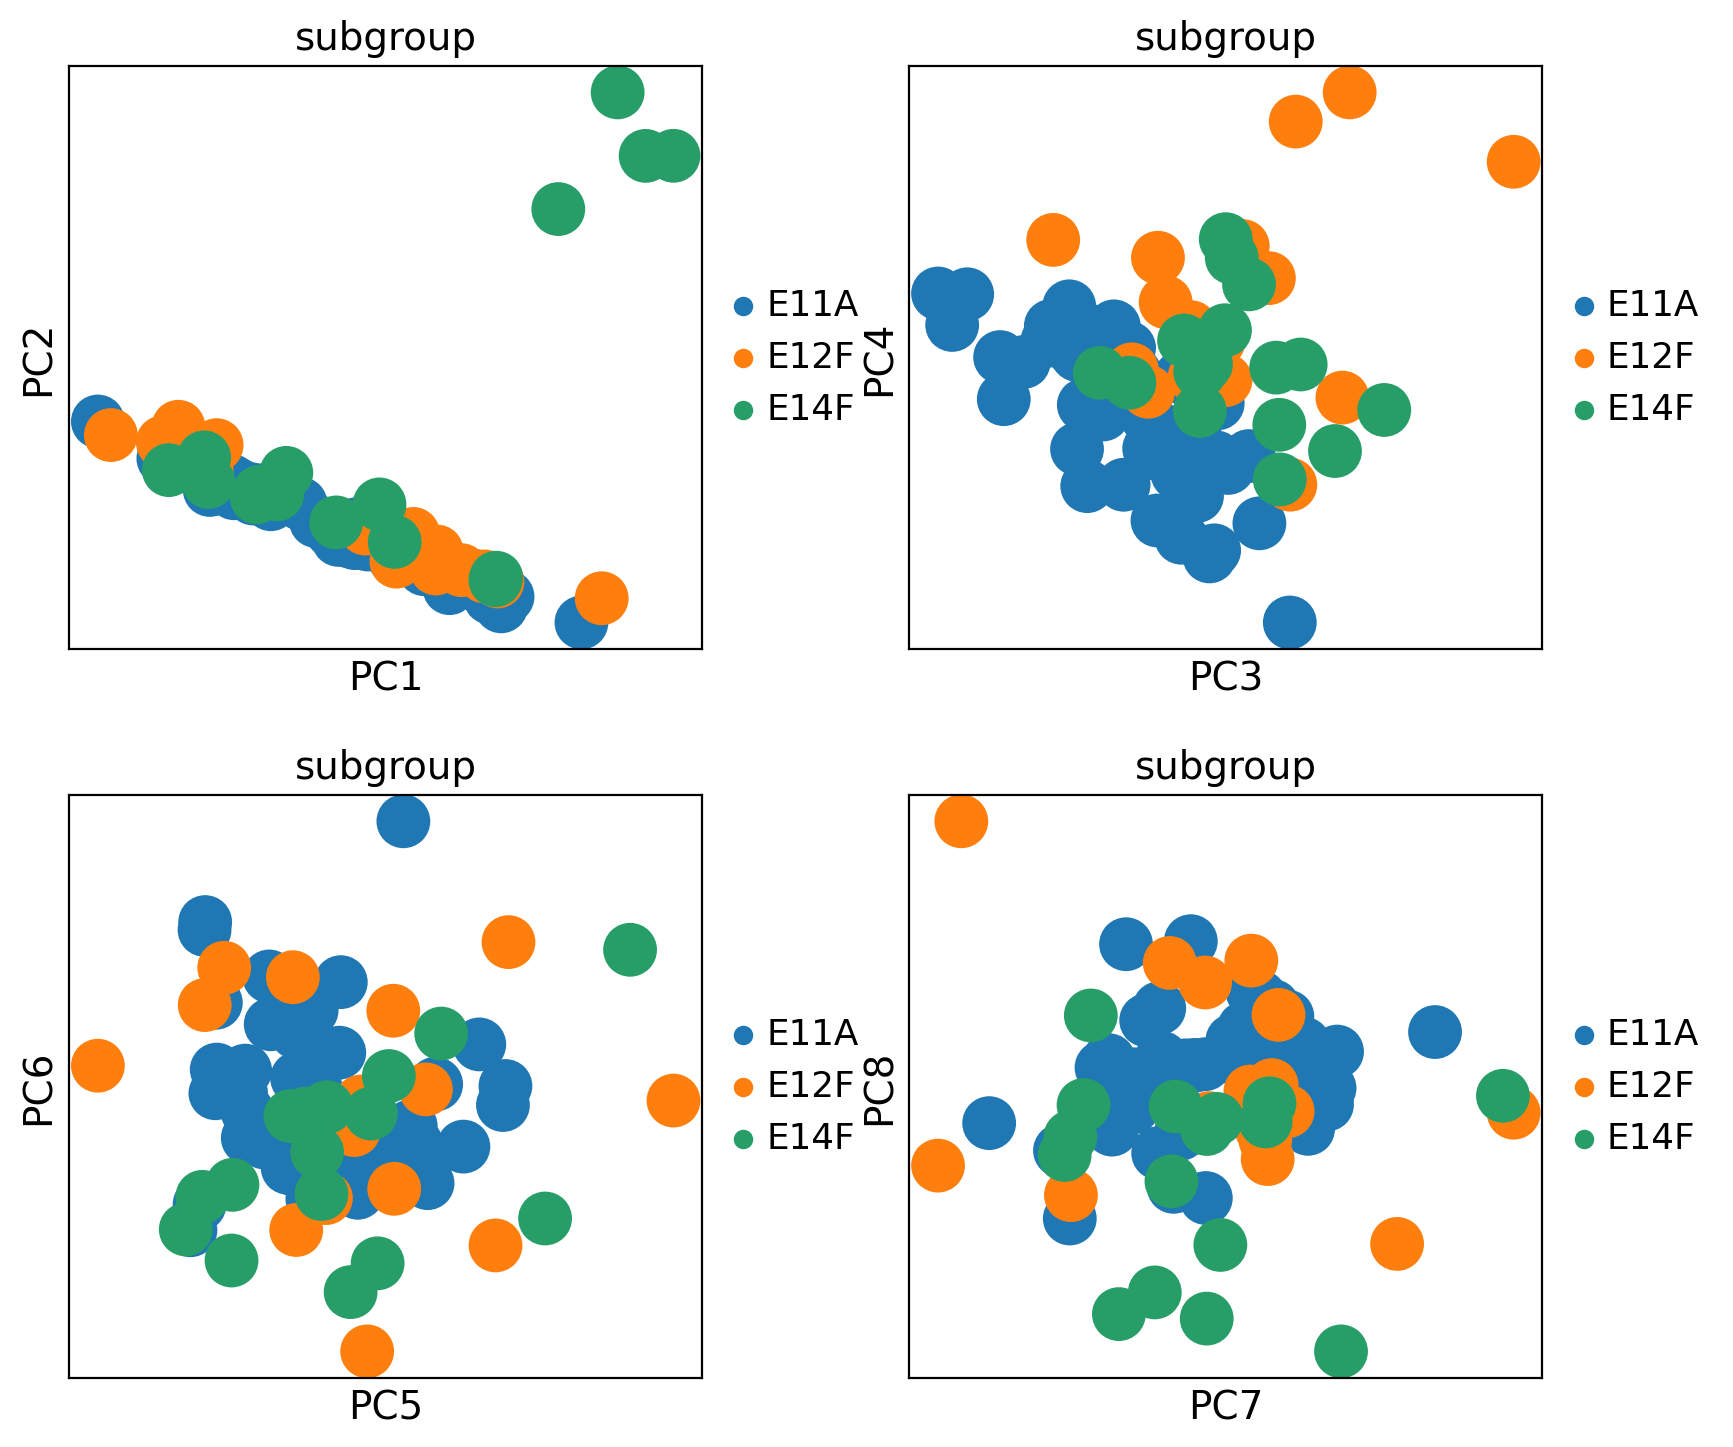

In [17]:
sc.pl.pca(adata,  color=['subgroup'], components = ['1,2','3,4','5,6','7,8'], ncols=2 )

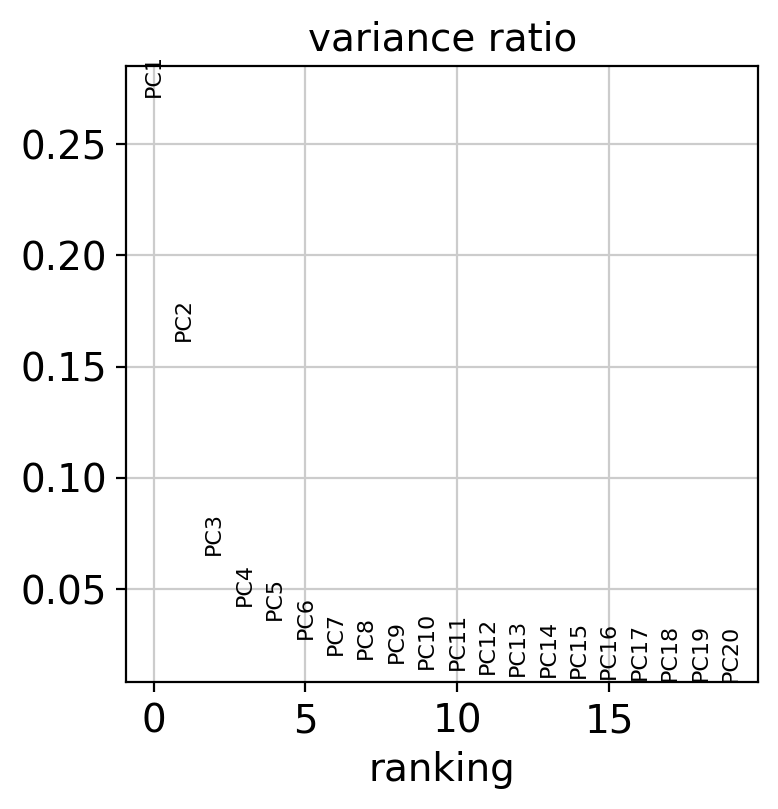

In [18]:
sc.pl.pca_variance_ratio(adata)

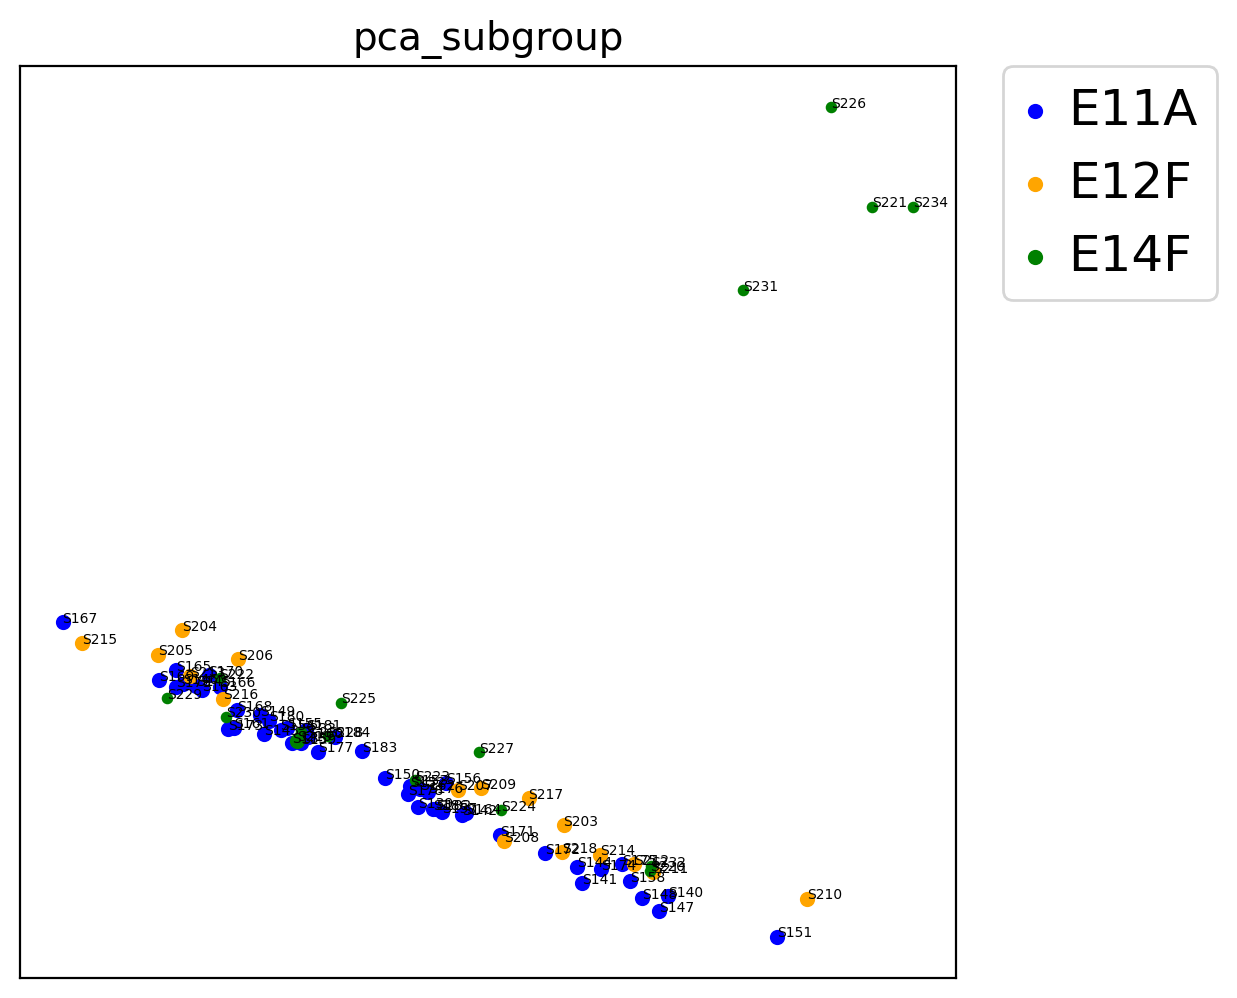

In [19]:
import matplotlib.pyplot as plt
title = ['subgroup', 'dpt_pseudotime','root','last']
title = ['pca'+'_'+i for i in title]

cell_group = adata.obs['subgroup'].cat.categories.values.tolist()
marker_size = 20
obsm_name = 'X_pca'

fig, ax = plt.subplots(1, 1,figsize=(6, 6))

cell_group_count = [False, False, False, False]
for i, g in enumerate(adata.obs['subgroup']):
    
    if g == cell_group[0]:
        if cell_group_count [0]:
              ax.scatter(adata.obsm[obsm_name][i, 0], adata.obsm[obsm_name][i, 1],  color= 'blue' ,s=marker_size)
        else:
            cell_group_count [0] = True
            ax.scatter(adata.obsm[obsm_name][i, 0], adata.obsm[obsm_name][i, 1],  color= 'blue',label=cell_group[0], s=marker_size )
    elif g == cell_group[1]:
        if cell_group_count [1]:
            ax.scatter(adata.obsm[obsm_name][i, 0], adata.obsm[obsm_name][i, 1],  color= 'orange' ,s=marker_size)
        else:
            cell_group_count [1] = True
            ax.scatter(adata.obsm[obsm_name][i, 0], adata.obsm[obsm_name][i, 1],  color= 'orange',label=cell_group[1], s=marker_size )
    elif g == cell_group[2]:
        if cell_group_count [2]:
            ax.scatter(adata.obsm[obsm_name][i, 0], adata.obsm[obsm_name][i, 1],  color= 'green' ,s=10)
        else:
            cell_group_count [2] = True
            ax.scatter(adata.obsm[obsm_name][i, 0], adata.obsm[obsm_name][i, 1],  color= 'green',label=cell_group[2], s=marker_size )
    elif g == cell_group[3]:
        if cell_group_count [3]:
            ax.scatter(adata.obsm[obsm_name][i, 0], adata.obsm[obsm_name][i, 1],  color= 'yellow' ,s=10)
        else:
            cell_group_count [3] = True
            ax.scatter(adata.obsm[obsm_name][i, 0], adata.obsm[obsm_name][i, 1],  color= 'yellow',label=cell_group[3], s=marker_size )


ax.tick_params(labelbottom=None,bottom=None) # del xaxis
ax.tick_params(labelleft=None,left=None) # del yaxis
ax.set_xticklabels([]) 
ax.tick_params(color='white')
ax.grid(None)
ax.set_title(title[0])
for j,(x,y) in enumerate(zip(adata.obsm[obsm_name][:, 0], adata.obsm[obsm_name][:, 1])):
    ax.annotate(str(adata.obs['number'][j]),(x,y),size=5)


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.savefig('figures/{}.pdf'.format(title[0]))
plt.show()


In [20]:
# Divided into left, right, top and center(S150) based on PCA

pri_range = []
for i in range(0, len(adata)):
        y = adata.obsm['X_pca'][i, 0]
        pri_range.append([adata.obs['number'][i],adata.obs['subgroup'][i], y])
        
num=11 #S150
print(pri_range[:2])
print(pri_range[num])

[['S139', 'E11A', 662.3284], ['S140', 'E11A', 32771.832]]
['S150', 'E11A', -3604.318]


In [21]:
# Divided into left, right, top and center(S150) based on PCA

num=11
print(pri_range[:2])
print(pri_range[num][2])
for i in range(0, len(adata)):
    if pri_range[i][2] > pri_range[num][2]:
        if pri_range[i][0] == 'S221':
            pri_range[i].extend(['top']) #top
        elif pri_range[i][0] == 'S226':
            pri_range[i].extend(['top']) #top
        elif pri_range[i][0] == 'S231':
            pri_range[i].extend(['top']) #top
        elif pri_range[i][0] == 'S234':
            pri_range[i].extend(['top']) #top
        else:
            pri_range[i].extend(['right']) #right
    elif pri_range[i][2] < pri_range[num][2]:
        pri_range[i].extend(['left']) #left
    elif pri_range[i][2] == pri_range[num][2]:
        pri_range[i].extend(['center']) #center
        

pdd = pd.DataFrame(pri_range)
df = pdd.sort_values(by=[2])
# df.to_csv('pca_x_coordinate.csv')

adata.obs['position'] = pdd[3].values
print(adata.obs['position'][:5])

[['S139', 'E11A', 662.3284], ['S140', 'E11A', 32771.832]]
-3604.318
823    right
824    right
825    right
826    right
827     left
Name: position, dtype: object


In [22]:
def dpt_pseudotime(num): 
    print('-' *100)
    group = 'subgroup'
    category_num = 0
    adata.uns['iroot'] = np.flatnonzero(adata.obs[group] == adata.obs[group].cat.categories[category_num])[num] 
    sc.tl.umap(adata, init_pos='paga', min_dist=0.005, maxiter=5, random_state=20)
    sc.tl.draw_graph(adata, init_pos='paga', layout='fr', maxiter=5, random_state=20)
    sc.tl.dpt(adata)
    print('root:'+adata.obs[group].cat.categories[category_num]+',num:'+str(num))
    sc.pl.paga(adata, layout='rt', root=[category_num], random_state=20, edge_width_scale=0.4, fontsize=10)
    sc.pl.umap(adata, color=[ 'subgroup', 'dpt_pseudotime','position'], size=100, legend_fontsize=10 ,legend_loc='on data', cmap='viridis_r')
    sc.pl.pca(adata, color=[ 'subgroup', 'dpt_pseudotime', 'position'], size=100, legend_fontsize=10 ,legend_loc='on data', cmap='viridis_r')
    sc.pl.draw_graph(adata, color=['subgroup','dpt_pseudotime','position'], size=100, legend_fontsize=10 ,legend_loc='on data', cmap='viridis_r')

... storing 'position' as categorical


running PAGA
    finished (0:00:00.01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])


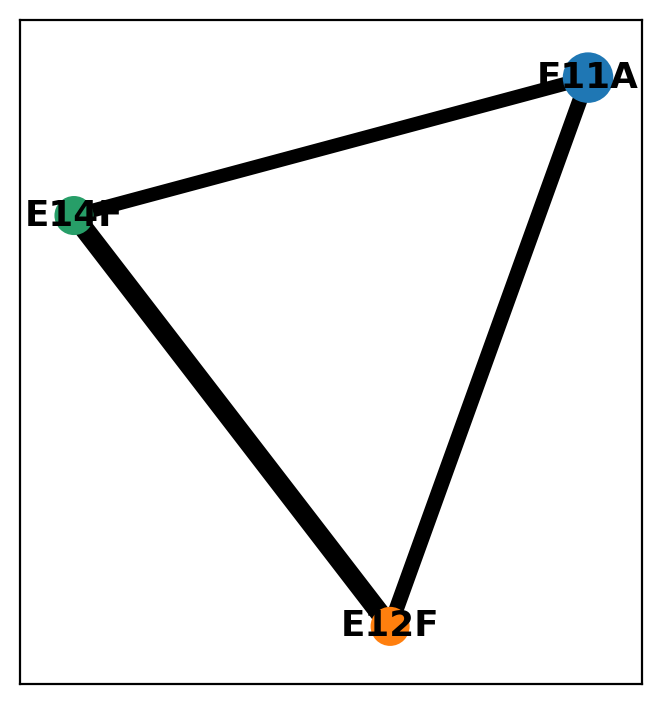

In [23]:
sc.tl.paga(adata,  groups='subgroup')
sc.pl.paga(adata, random_state=10)

----------------------------------------------------------------------------------------------------
computing UMAP
    using 'X_pca' with n_pcs = 20
    finished (0:00:01.91) --> added
    'X_umap', UMAP coordinates (adata.obsm)
drawing single-cell graph using layout "fr"
    finished (0:00:00.00) --> added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm)
computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [ 1.          0.91762614  0.7311565   0.6671257   0.6508977   0.54687595
      0.52202475  0.44500992  0.40485108  0.34843722 -0.35834154 -0.38685012
     -0.40489423 -0.41191903 -0.4309267 ]
    finished (0:00:00.00) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00.00) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)
root:E11A,num:11
--> added 'pos', the PAGA positions (adata.un

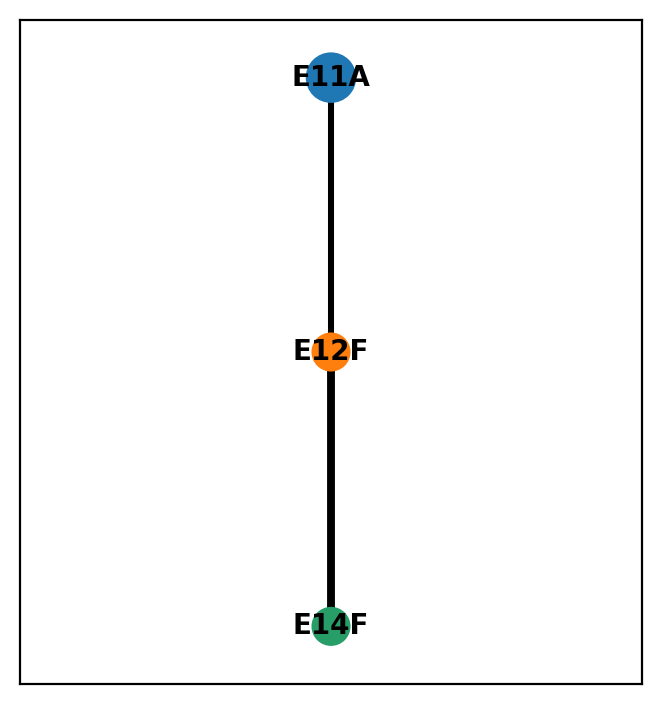

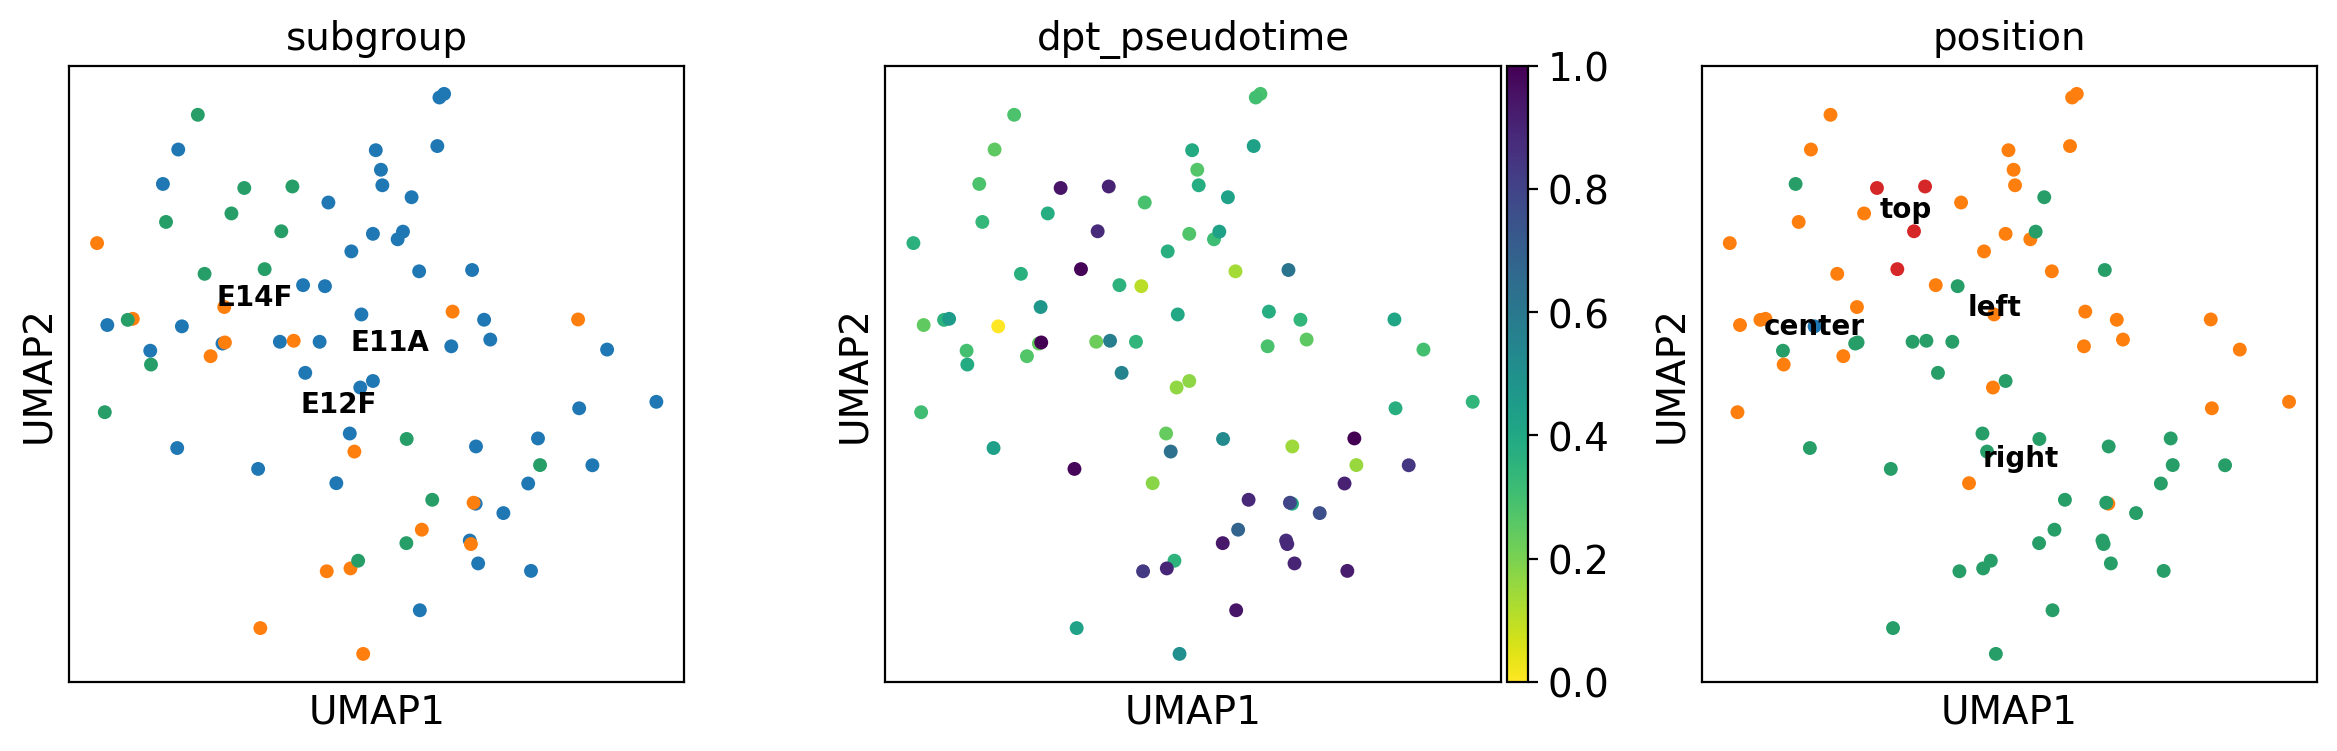

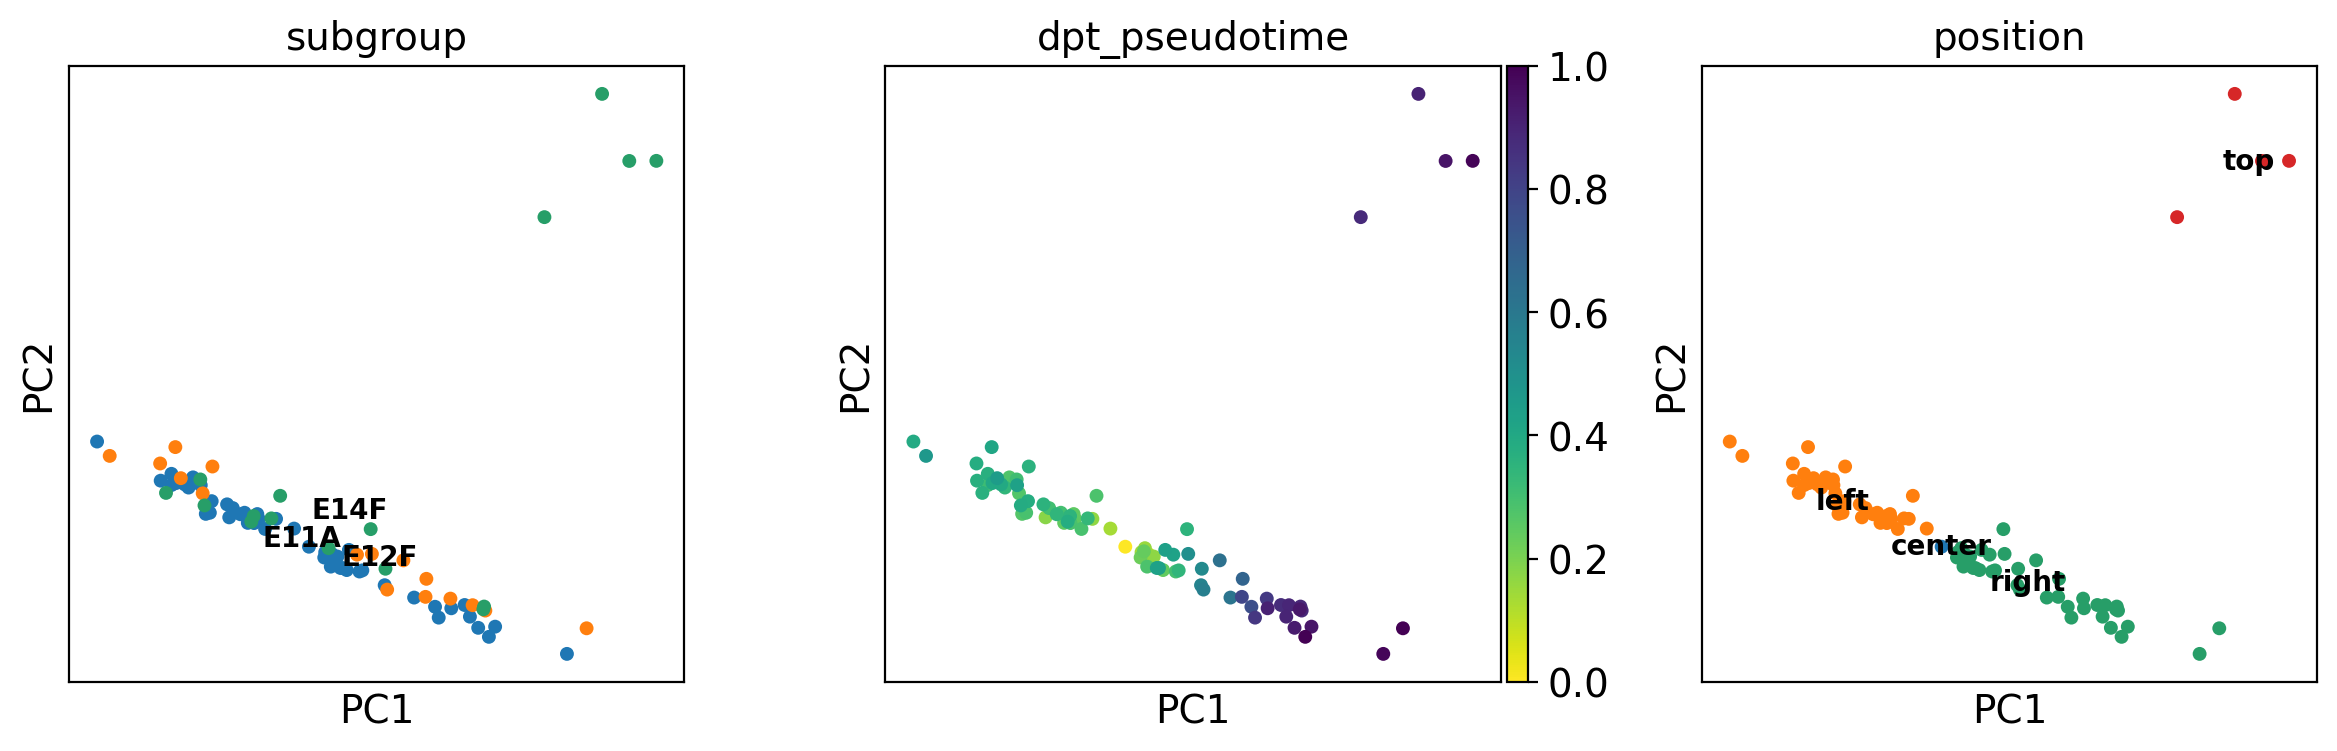

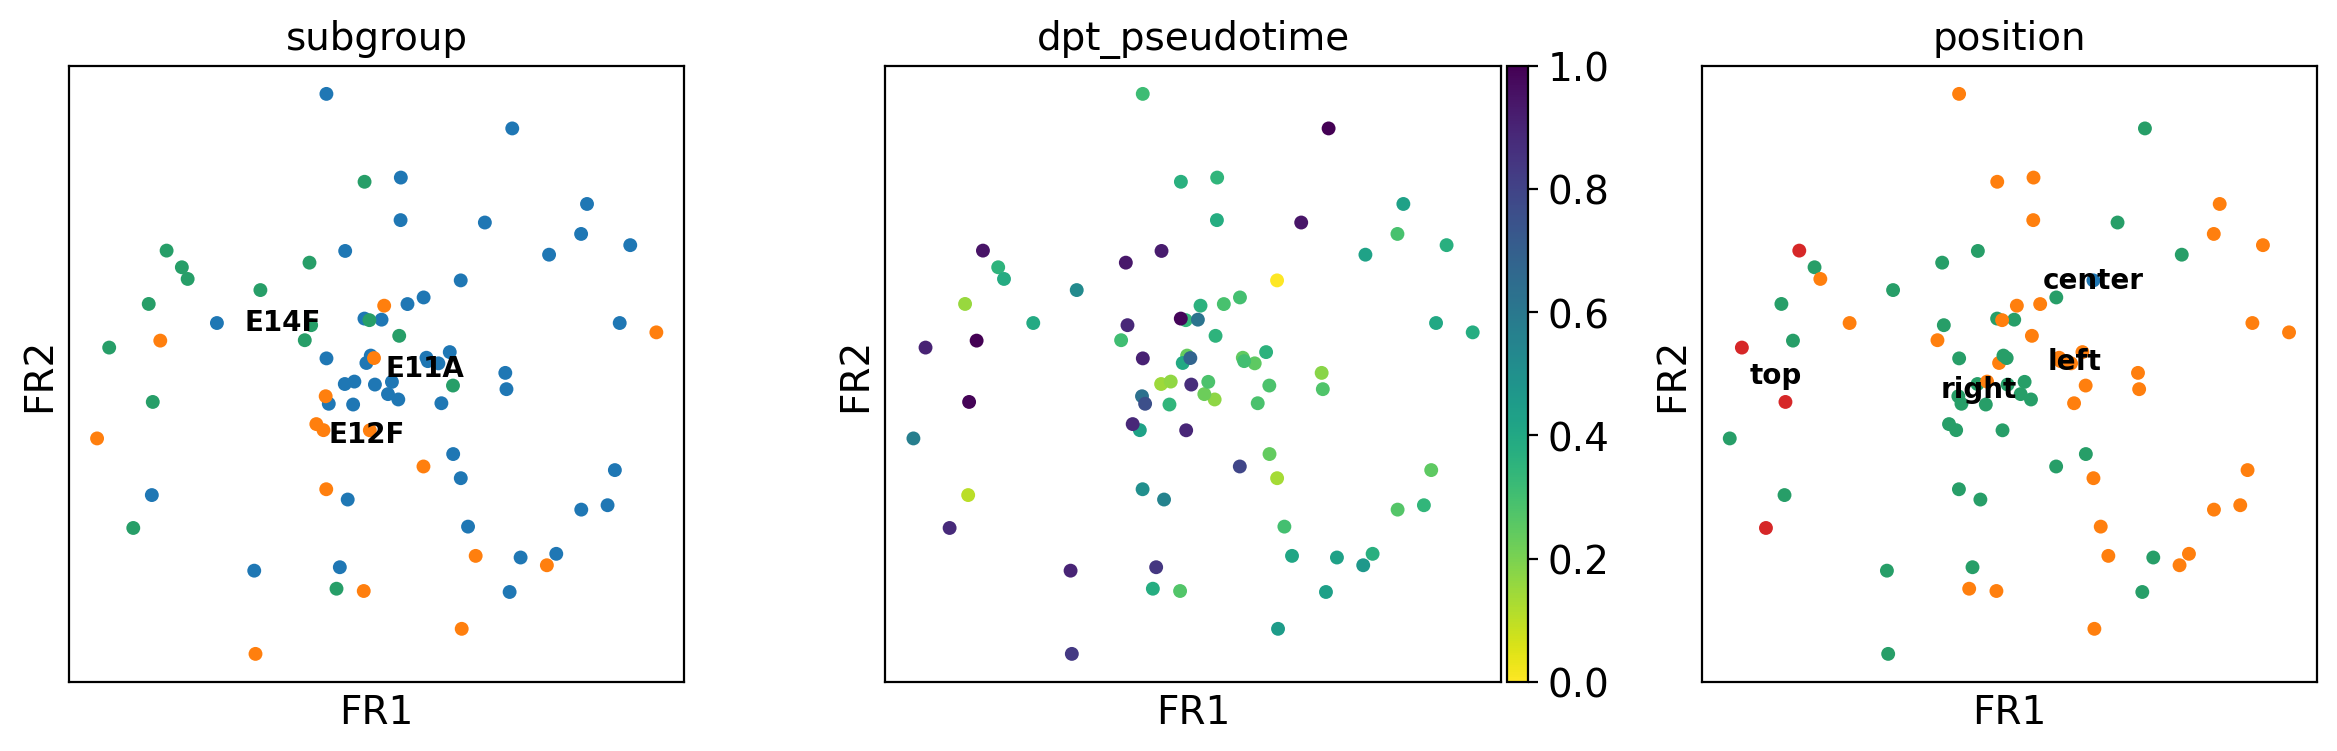

In [24]:
dpt_pseudotime(11) #S150

In [25]:
adata.write(results_file)

In [26]:
adata = sc.read(results_file)

In [27]:
adata

AnnData object with n_obs × n_vars = 80 × 31053 
    obs: 'batch', 'number', 'subgroup', 'position', 'dpt_pseudotime'
    var: 'Accession-0-0-0', 'Chromosome-0-0-0', 'End-0-0-0', 'Start-0-0-0', 'Strand-0-0-0', 'Accession-1-0-0', 'Chromosome-1-0-0', 'End-1-0-0', 'Start-1-0-0', 'Strand-1-0-0', 'Accession-1-0', 'Chromosome-1-0', 'End-1-0', 'Start-1-0', 'Strand-1-0', 'Accession-1', 'Chromosome-1', 'End-1', 'Start-1', 'Strand-1'
    uns: 'diffmap_evals', 'draw_graph', 'iroot', 'neighbors', 'paga', 'pca', 'position_colors', 'subgroup_colors', 'subgroup_sizes'
    obsm: 'X_pca', 'X_draw_graph_fr', 'X_umap', 'X_diffmap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [28]:
target_gene = 'Bcat1'

In [29]:
adata[:, target_gene].X[-20:] #Raw Count (gene count / cells)

array([   0.,    0.,    0.,    0., 1625.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,  135.,    2.,    0.,
          0.,    0.], dtype=float32)

In [30]:
adata[:, target_gene].layers['spliced'][-20:].toarray() #Raw 'spliced' Count (gene count / cells)

array([[   0.],
       [   0.],
       [   0.],
       [   0.],
       [1625.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [ 135.],
       [   2.],
       [   0.],
       [   0.],
       [   0.]], dtype=float32)

In [31]:
scv.utils.show_proportions(adata)

Abundance of ['spliced', 'unspliced', 'ambiguous']: [0.93 0.03 0.04]


In [32]:
scv.pp.filter_and_normalize(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [33]:
scv.pp.moments(adata)
scv.tl.velocity(adata, mode='stochastic')
sc.pp.neighbors(adata, n_neighbors=20)

computing neighbors
    finished (0:00:00) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished (0:00:00.00) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [34]:
adata[:, target_gene].X[-20:] #Normalized　Count (gene count / cells)

array([0.       , 0.       , 0.       , 0.       , 7.2111444, 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 4.607682 , 1.0711372, 0.       ,
       0.       , 0.       ], dtype=float32)

In [35]:
adata[:, target_gene].layers['spliced'][-20:].toarray()  #Ms='spliced' normalized Count (gene count / cells)

array([[   0.       ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [1353.4414   ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [   0.       ],
       [  99.25154  ],
       [   1.9186969],
       [   0.       ],
       [   0.       ],
       [   0.       ]], dtype=float32)

In [36]:
adata[:, target_gene].layers['Ms'][-20:]  #Ms='spliced' normalized & velocity estimate Count (gene count / cells)

array([9.2678551e+01, 6.2828152e+01, 0.0000000e+00, 2.2866905e+00,
       5.9156513e+01, 2.3453236e+00, 6.3956566e-02, 8.4253220e+01,
       5.8245136e+01, 2.8898178e+01, 5.9592781e+01, 6.3956566e-02,
       4.3659397e+01, 3.6817596e+01, 7.3981377e+01, 6.6198952e+01,
       6.3956566e-02, 2.3453236e+00, 4.6768295e+01, 3.0489206e+00],
      dtype=float32)

In [37]:
adata[:, target_gene].layers['Mu'][-20:]  #Mu='unspliced' normalized & velocity estimate Count (gene count / cells)

array([0.18813622 , 0.03205313 , 0.034967054, 0.02884782 , 0.14463827 ,
       0.029587507, 0.         , 0.17103292 , 0.02683518 , 0.023078255,
       0.13766064 , 0.03846376 , 0.         , 0.14463827 , 0.17103292 ,
       0.16185713 , 0.03846376 , 0.029587507, 0.18372971 , 0.         ],
      dtype=float32)

In [38]:
scv.tl.velocity_graph(adata)
scv.tl.velocity_embedding(adata, basis='pca')

computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


In [39]:
scv.settings.set_figure_params('scvelo')

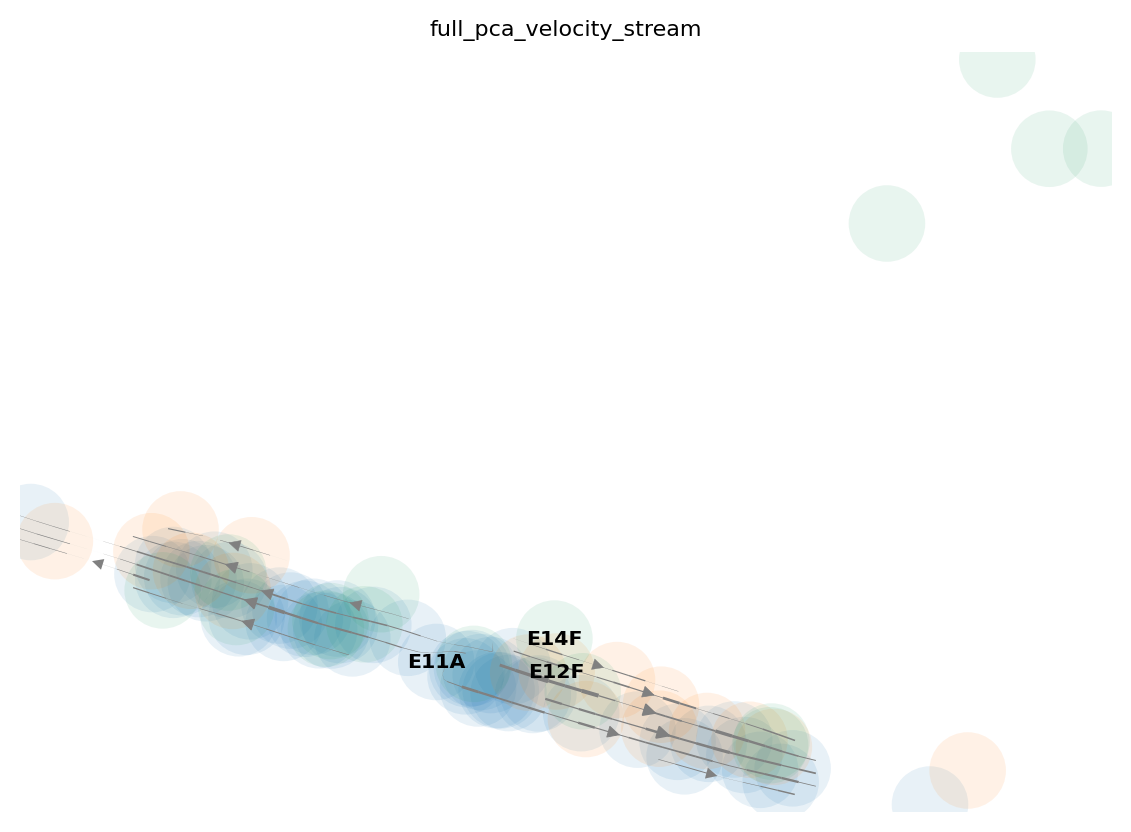

In [40]:
scv.pl.velocity_embedding_stream(adata, basis='pca', color='subgroup' , title='full_pca_velocity_stream')

saving figure to file ./figures/velocity_pca_full.pdf


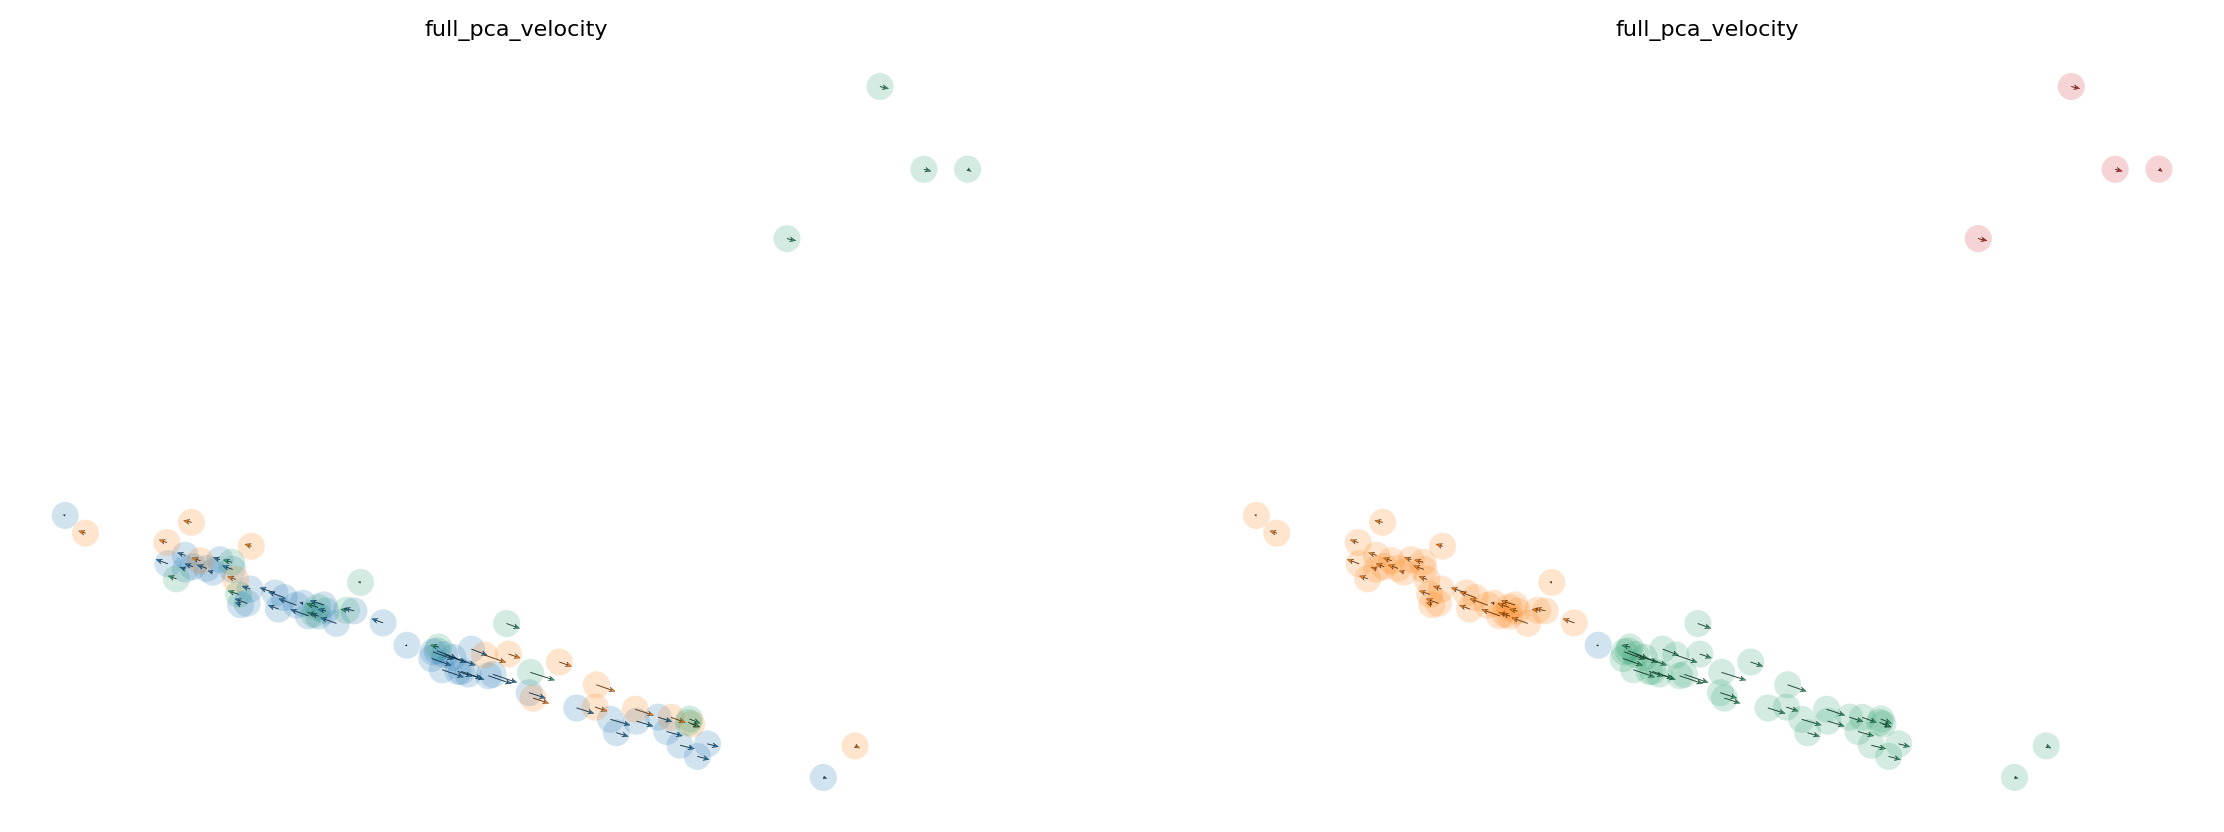

In [41]:
scv.pl.velocity_embedding(adata, basis='pca',color=['subgroup','position'], title='full_pca_velocity' , save='full.pdf')

In [42]:
adata.write(results_file)